In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import mlflow

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/data_2023-01-30 09:22:13_2023-02-07 20:42:17.csv',parse_dates=True)
dff=df['energyValue']
dff.fillna(method='ffill').to_csv('/content/drive/MyDrive/data/nda.csv')
print(dff.shape)
dff.head()

(72161,)


0    5307582.0
1    5307583.0
2    5307583.5
3    5307584.0
4    5307584.5
Name: energyValue, dtype: float64

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/nda.csv',index_col='datetime',parse_dates=True)
df.head()

,energyValue
datetime,
2023-01-30 09:22:13,5307582.0
2023-01-30 09:22:23,5307583.0
2023-01-30 09:22:33,5307583.5
2023-01-30 09:22:43,5307584.0
2023-01-30 09:22:53,5307584.5


In [ ]:
# data = {'time': df_t,
#         'Energy': df_e}

# df = pd.DataFrame(data)

# df.to_csv('/content/drive/MyDrive/data/da.csv', index=False)

In [ ]:
# import pandas as pd

# # Read the CSV file into a dataframe
# df = pd.read_csv('/content/drive/MyDrive/data/ds.csv')

# # Convert the 'time' column to a datetime object
# df['time'] = pd.to_datetime(df['time'])

# # Extract year, week, and minutes
# df['year'] = df['time'].dt.year
# df['week'] = df['time'].dt.week
# df['minute'] = df['time'].dt.minute

# # Save the new dataframe to a new CSV file
# df.to_csv('/content/drive/MyDrive/data/energy_data_with_year_week_minute.csv', index=False)


<ipython-input-47-6e30213b87aa>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['time'].dt.week


AttributeError: ignored

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/data/ds.csv',index_col='time',parse_dates=True)
# #df.index.freq='MS'
# # df.head()
# df=df[['energyValue']]

# df=df[['energyValue']]
# df.fillna(method='ffill').to_csv('/content/drive/MyDrive/data/nda.csv')
# print(df.shape)

(12106, 1)


In [ ]:
# import pandas as pd

# # Assuming energy data is in a dataframe named "df"
# # Set the time column as the index
# #df['datetime'] = pd.to_datetime(df['time'])
# df = df.set_index('a')

# # Resample the data to weekly frequency
# df_weekly = df.resample('W').sum()

KeyError: ignored

<AxesSubplot:>

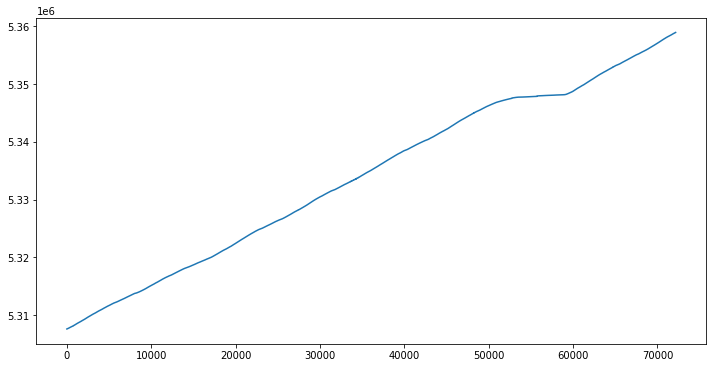

In [ ]:
dff.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# results = seasonal_decompose(df[['time']])
# results.plot()

KeyError: ignored

In [ ]:
# len(df)

In [ ]:
train = dff.iloc[:10000]
test = dff.iloc[10000:]
test.head()

datetime
2023-01-31 13:20:54    5315119.5
2023-01-31 13:21:04    5315120.5
2023-01-31 13:21:14    5315121.5
2023-01-31 13:21:24    5315122.0
2023-01-31 13:21:34    5315122.5
Name: energyValue, dtype: float64

In [ ]:
# # Define the split time
# split_time = 60000

# # Get the train set 
# time_train = time[:split_time]
# x_train = series[:split_time]

# # Get the validation set
# time_valid = time[split_time:]
# x_valid = series[split_time:]

In [ ]:
# Parameters# Define the split time
# split_time = 60000

# # Get the train set 
# time_train = time[:split_time]
# x_train = series[:split_time]

# # Get the validation set
# time_valid = time[split_time:]
# x_valid = series[split_time:]
window_size = 30
batch_size = 64
shuffle_buffer_size = 1000

In [ ]:
test.head(20),test.tail(20)

(datetime
 2023-01-31 13:20:54    5315119.5
 2023-01-31 13:21:04    5315120.5
 2023-01-31 13:21:14    5315121.5
 2023-01-31 13:21:24    5315122.0
 2023-01-31 13:21:34    5315122.5
 2023-01-31 13:21:44    5315123.5
 2023-01-31 13:21:54    5315124.0
 2023-01-31 13:22:04    5315125.0
 2023-01-31 13:22:14    5315126.0
 2023-01-31 13:22:24    5315127.0
 2023-01-31 13:22:34    5315128.0
 2023-01-31 13:22:44    5315128.5
 2023-01-31 13:22:54    5315129.5
 2023-01-31 13:23:04    5315130.5
 2023-01-31 13:23:14    5315131.0
 2023-01-31 13:23:24    5315132.0
 2023-01-31 13:23:34    5315133.0
 2023-01-31 13:23:44    5315133.5
 2023-01-31 13:23:54    5315134.5
 2023-01-31 13:24:04    5315135.0
 Name: energyValue, dtype: float64, datetime
 2023-02-07 20:39:07    5358925.0
 2023-02-07 20:39:17    5358926.0
 2023-02-07 20:39:27    5358926.5
 2023-02-07 20:39:37    5358927.5
 2023-02-07 20:39:47    5358928.0
 2023-02-07 20:39:57    5358928.5
 2023-02-07 20:40:07    5358929.5
 2023-02-07 20:40:17    535

In [ ]:
train.head(),train.tail(20)

(datetime
 2023-01-30 09:22:13    5307582.0
 2023-01-30 09:22:23    5307583.0
 2023-01-30 09:22:33    5307583.5
 2023-01-30 09:22:43    5307584.0
 2023-01-30 09:22:53    5307584.5
 Name: energyValue, dtype: float64, datetime
 2023-01-31 13:17:34    5315103.0
 2023-01-31 13:17:44    5315104.5
 2023-01-31 13:17:54    5315105.0
 2023-01-31 13:18:04    5315106.0
 2023-01-31 13:18:14    5315107.0
 2023-01-31 13:18:24    5315107.5
 2023-01-31 13:18:34    5315108.5
 2023-01-31 13:18:44    5315109.5
 2023-01-31 13:18:54    5315110.0
 2023-01-31 13:19:04    5315110.5
 2023-01-31 13:19:14    5315111.5
 2023-01-31 13:19:24    5315112.0
 2023-01-31 13:19:37    5315113.0
 2023-01-31 13:19:44    5315114.0
 2023-01-31 13:19:54    5315114.5
 2023-01-31 13:20:04    5315115.5
 2023-01-31 13:20:14    5315116.5
 2023-01-31 13:20:24    5315117.0
 2023-01-31 13:20:34    5315118.0
 2023-01-31 13:20:44    5315119.0
 Name: energyValue, dtype: float64)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(train, window_size, batch_size, shuffle_buffer_size)
print(dataset)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


<PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 30, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 30, 64)           8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-traina

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=2, callbacks=[lr_schedule])

Epoch 1/2
156/156 [==============================] - 34s 83ms/step - loss: 5311492.5000 - lr: 1.0000e-08
Epoch 2/2
156/156 [==============================] - 14s 87ms/step - loss: 5311490.0000 - lr: 1.1220e-08


ValueError: ignored

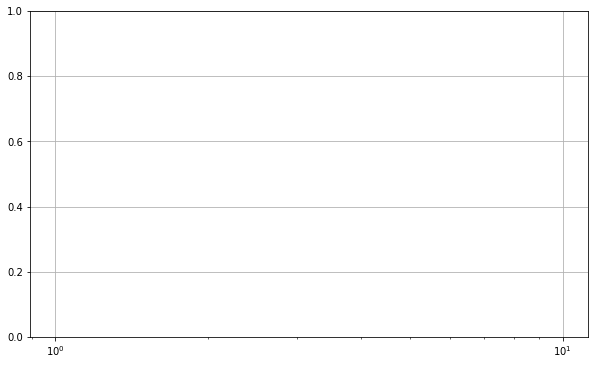

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 30])

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),           
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 2e-8

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae","mse"])

# Train the model
history = model.fit(dataset,epochs=2)
#model.save('/content/drive/MyDrive/data/1_my_model.h5')

Epoch 1/2
156/156 [==============================] - 114s 564ms/step - loss: 5311501.0000 - mae: 5311501.5000 - mse: 28212040040448.0000
Epoch 2/2
156/156 [==============================] - 89s 571ms/step - loss: 5311493.5000 - mae: 5311494.5000 - mse: 28211968737280.0000


In [ ]:
model.save('/content/drive/MyDrive/data/my_model.h5')

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/data/my_model.h5')
predicted_values = model.predict(test)
print(predicted_values)

381/381 [==============================] - 5s 5ms/step


In [ ]:
print(predicted_values)

[[913994.75]
 [913994.75]
 [913994.75]
 ...
 [913994.75]
 [913994.75]
 [913994.8 ]]


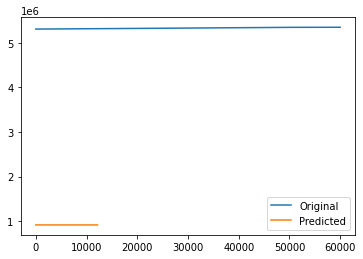

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train, label='Original')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()


In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

NameError: ignored

In [ ]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 30])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# scaler = MinMaxScaler()
# scaler.fit(train)

# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

ValueError: ignored

In [ ]:
df.head(20),df.tail()

(                      energyValue
 time                             
 2023-01-30 09:22:00  5.307583e+06
 2023-01-30 09:23:00  5.307587e+06
 2023-01-30 09:24:00  5.307590e+06
 2023-01-30 09:25:00  5.307594e+06
 2023-01-30 09:26:00  5.307598e+06
 2023-01-30 09:27:00  5.307602e+06
 2023-01-30 09:28:00  5.307606e+06
 2023-01-30 09:29:00  5.307610e+06
 2023-01-30 09:30:00  5.307613e+06
 2023-01-30 09:31:00  5.307617e+06
 2023-01-30 09:32:00  5.307621e+06
 2023-01-30 09:33:00  5.307624e+06
 2023-01-30 09:34:00  5.307627e+06
 2023-01-30 09:35:00  5.307631e+06
 2023-01-30 09:36:00  5.307634e+06
 2023-01-30 09:37:00  5.307638e+06
 2023-01-30 09:38:00  5.307643e+06
 2023-01-30 09:39:00  5.307647e+06
 2023-01-30 09:40:00  5.307651e+06
 2023-01-30 09:41:00  5.307655e+06,                       energyValue
 time                             
 2023-02-07 20:38:00  5.358922e+06
 2023-02-07 20:39:00  5.358927e+06
 2023-02-07 20:40:00  5.358931e+06
 2023-02-07 20:41:00  5.358935e+06
 2023-02-07 20:42:00

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

NotFittedError: ignored

In [ ]:
scaled_train[:10]

array([[0.00000000e+00],
       [7.99689591e-05],
       [1.69730035e-04],
       [2.61939141e-04],
       [3.65572384e-04],
       [4.57373485e-04],
       [5.53254635e-04],
       [6.45055736e-04],
       [7.34816812e-04],
       [8.26617913e-04]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[2]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00016973 0.00026194 0.00036557 0.00045737 0.00055325 0.00064506
 0.00073482]
Predict this y: 
 [[0.00082662]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [ ]:
# # define model
# model = Sequential()
# model.add(LSTM(400, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
model.fit(generator,epochs=3)

Epoch 1/3
 564/9993 [>.............................] - ETA: 8:24 - loss: nan

KeyboardInterrupt: ignored

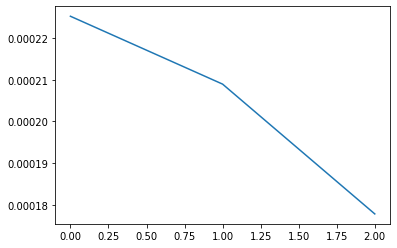

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-7:]
print(last_train_batch.shape)

(7, 1)


In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
print(last_train_batch.shape)


(1, 7, 1)


In [ ]:
#true_predictions = scaler.inverse_transform(last_train_batch)
print(true_predictions)
#model.predict(last_train_batch)

ValueError: ignored

In [ ]:
scaled_test[0]

array([1.00009588])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
test_predictions

[array([1.0006728], dtype=float32),
 array([1.0013415], dtype=float32),
 array([1.0016608], dtype=float32),
 array([1.0019939], dtype=float32),
 array([1.0024378], dtype=float32),
 array([1.0028403], dtype=float32),
 array([1.0032067], dtype=float32),
 array([1.003607], dtype=float32),
 array([1.0040178], dtype=float32),
 array([1.004405], dtype=float32),
 array([1.0047855], dtype=float32),
 array([1.0051734], dtype=float32),
 array([1.0055606], dtype=float32),
 array([1.0059452], dtype=float32),
 array([1.0063319], dtype=float32),
 array([1.0067197], dtype=float32),
 array([1.0071058], dtype=float32),
 array([1.0074909], dtype=float32),
 array([1.0078764], dtype=float32),
 array([1.0082619], dtype=float32),
 array([1.0086467], dtype=float32),
 array([1.0090313], dtype=float32),
 array([1.0094161], dtype=float32),
 array([1.0098007], dtype=float32),
 array([1.010185], dtype=float32),
 array([1.0105691], dtype=float32),
 array([1.010953], dtype=float32),
 array([1.0113366], dtype=float3

In [ ]:
test_predictions

[array([1.0006728], dtype=float32),
 array([1.0013415], dtype=float32),
 array([1.0016608], dtype=float32),
 array([1.0019939], dtype=float32),
 array([1.0024378], dtype=float32),
 array([1.0028403], dtype=float32),
 array([1.0032067], dtype=float32),
 array([1.003607], dtype=float32),
 array([1.0040178], dtype=float32),
 array([1.004405], dtype=float32),
 array([1.0047855], dtype=float32),
 array([1.0051734], dtype=float32),
 array([1.0055606], dtype=float32),
 array([1.0059452], dtype=float32),
 array([1.0063319], dtype=float32),
 array([1.0067197], dtype=float32),
 array([1.0071058], dtype=float32),
 array([1.0074909], dtype=float32),
 array([1.0078764], dtype=float32),
 array([1.0082619], dtype=float32),
 array([1.0086467], dtype=float32),
 array([1.0090313], dtype=float32),
 array([1.0094161], dtype=float32),
 array([1.0098007], dtype=float32),
 array([1.010185], dtype=float32),
 array([1.0105691], dtype=float32),
 array([1.010953], dtype=float32),
 array([1.0113366], dtype=float3

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-96-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='time'>

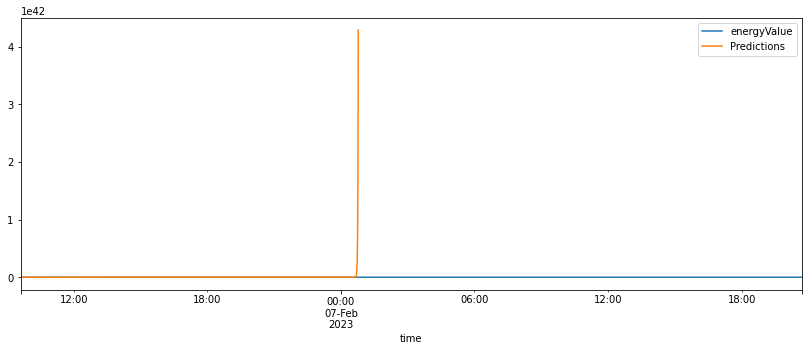

In [ ]:
test.plot(figsize=(14,5))